For detailed information about the dataset and its respective preparation and/or Principal Component Analysis please look at 'Titanic(age_by_mean)_PCA_LogisticRegression'. In this file I will skip each step explained in that file and will talk about only the things not covered in it.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, confusion_matrix
df = pd.read_csv('Data/titanic_train.csv')

In [2]:
df = df.drop(['Name','Ticket','Cabin'], axis=1)

In [3]:
df.loc[:,"Age"].median()


28.0

In [4]:
df["Age"].fillna(28, inplace = True)

In [5]:
df.dropna(inplace=True)

In [6]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

In [7]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [8]:
X=df.drop('Survived',axis=1)
X_renamed = X.rename(columns={'SibSp': 'Num Siblings/Spoused','Parch':'Num Parents/Children'})
y=df['Survived']

I will import the Gradient Boost Classifier library and try to find out which hyperparameters suit our dataset best, note that standardization is required for this method.

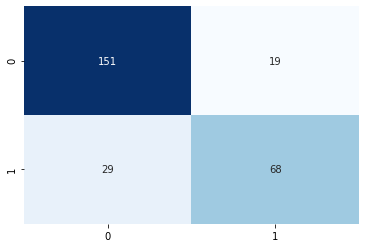

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=2)
scaler = StandardScaler()
scaler.fit(X_renamed)
X_renamed = scaler.transform(X_renamed)
X_trainGBC, X_testGBC, y_trainGBC, y_testGBC = train_test_split(X_renamed, y, test_size=0.3,random_state=2)

GBC.fit(X_trainGBC, y_trainGBC)
y_predGBC = GBC.predict(X_testGBC)


cfm = confusion_matrix(y_testGBC,y_predGBC)
sns.heatmap(cfm, cbar=False, annot=True, cmap='Blues', fmt='d')

The maximum variance score is for 1 depth is: 0.28756822316555486 .
The best number of estimators for 1  depth, is:  4 .
The maximum variance score is for 2 depth is: 0.1418435415403274 .
The best number of estimators for 2  depth, is:  7 .
The maximum variance score is for 3 depth is: 0.255184960582171 .
The best number of estimators for 3  depth, is:  8 .
The maximum variance score is for 4 depth is: 0.271376591873863 .
The best number of estimators for 4  depth, is:  10 .
The maximum variance score is for 5 depth is: 0.3361431170406307 .
The best number of estimators for 5  depth, is:  10 .


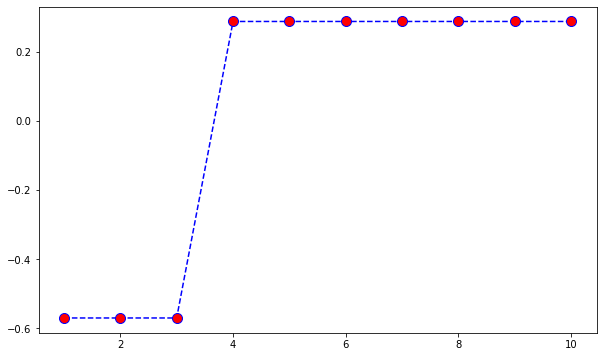

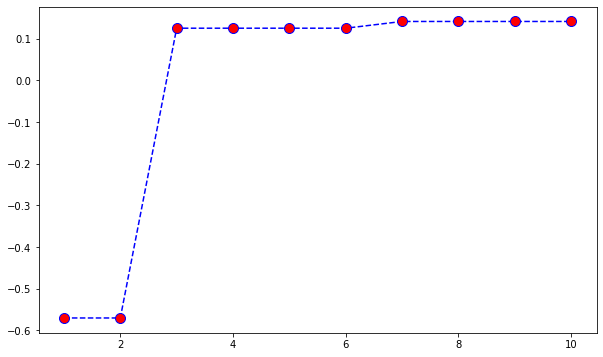

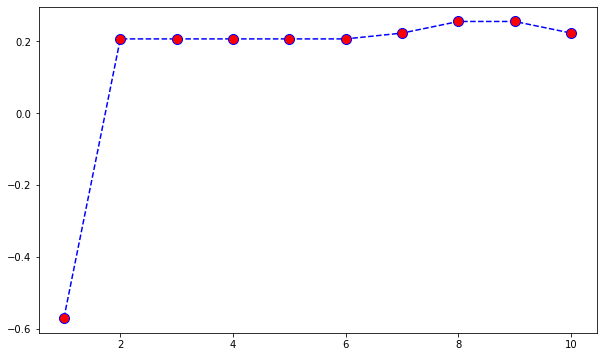

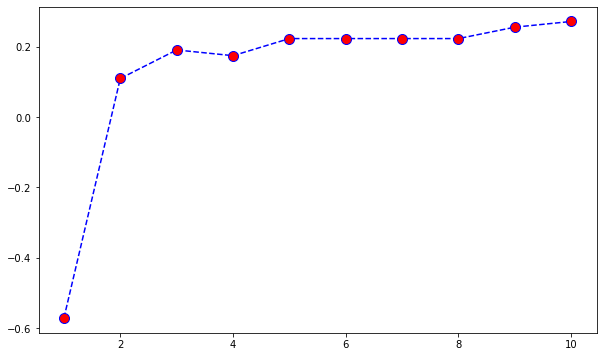

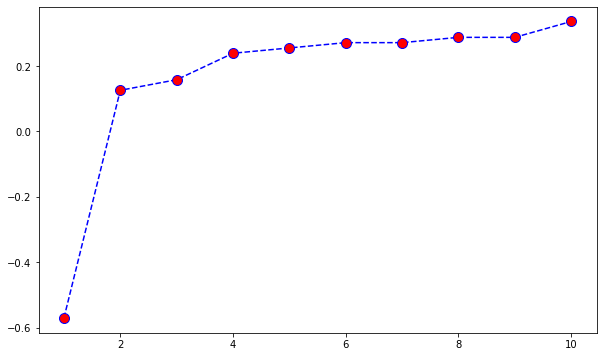

In [10]:
ranged = []
for d in (range(1,6)):
    variance_score = []
    for n in range (1,11):
        GBC = GradientBoostingClassifier(max_depth=d,n_estimators=n,learning_rate=0.1,random_state=2)
        GBC.fit(X_trainGBC,y_trainGBC)
        y_predGBC = GBC.predict(X_testGBC)
        variance_score.append(r2_score(y_testGBC, y_predGBC))
    ranged.append(variance_score)
    plt.figure(figsize=(10,6))
    plt.plot(range(1,11),variance_score,color='blue',linestyle='dashed',marker='o', markerfacecolor='red',markersize=10)
    print('The maximum variance score is for',d,'depth is:',max(variance_score),'.')
    index = variance_score.index(max(variance_score))
    estimators = index + 1
    print('The best number of estimators for', d,' depth, is: ',estimators,'.')


10 seems to be the number where the variance stabilizes so I will proceed with 10 estimators.

In [11]:
estimators = 10
list_lr=[0.05,0.075,0.1,0.25,0.5,0.75,1.0]
for d in (range(1,6)):
    variance_score = []
    score = []
    for lr in list_lr:
        GBC = GradientBoostingClassifier(max_depth=d,n_estimators=estimators,learning_rate=lr)
        GBC.fit(X_trainGBC,y_trainGBC)
        y_predGBC = GBC.predict(X_testGBC)
        variance_score.append(r2_score(y_testGBC, y_predGBC))
        score.append(GBC.score(X_trainGBC, y_trainGBC))
    print('The maximum variance score for',d,'depth is:',max(variance_score),'.')
    index_variance = variance_score.index(max(variance_score))
    lr_variance = list_lr[index_variance]
    print('The best learning rate, according to variance, for', d,' depth, is: ',lr_variance,'.\n')
    print('The maximum score for',d,'depth is:',max(score),'.')
    index_score = score.index(max(score))
    lr_score = list_lr[index_score]
    print('The best learning rate,according to score, for', d,' depth, is: ',lr_score,'.\n')

The maximum variance score for 1 depth is: 0.40090964220739844 .
The best learning rate, according to variance, for 1  depth, is:  0.5 .

The maximum score for 1 depth is: 0.8086816720257235 .
The best learning rate,according to score, for 1  depth, is:  1.0 .

The maximum variance score for 2 depth is: 0.38471801091570645 .
The best learning rate, according to variance, for 2  depth, is:  0.25 .

The maximum score for 2 depth is: 0.8504823151125402 .
The best learning rate,according to score, for 2  depth, is:  1.0 .

The maximum variance score for 3 depth is: 0.3199514857489387 .
The best learning rate, according to variance, for 3  depth, is:  0.25 .

The maximum score for 3 depth is: 0.8971061093247589 .
The best learning rate,according to score, for 3  depth, is:  1.0 .

The maximum variance score for 4 depth is: 0.30375985445724685 .
The best learning rate, according to variance, for 4  depth, is:  0.25 .

The maximum score for 4 depth is: 0.9405144694533762 .
The best learning r

I will chose according to score in this case, so I will proceed with a depth of 5 and a learning rate of 1.

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       170
           1       0.71      0.71      0.71        97

    accuracy                           0.79       267
   macro avg       0.77      0.77      0.77       267
weighted avg       0.79      0.79      0.79       267



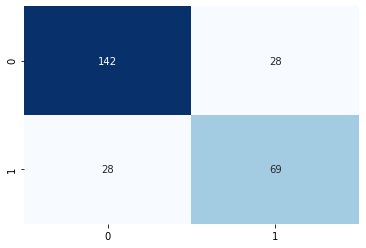

In [12]:
GBC = GradientBoostingClassifier(max_depth=5,n_estimators=10,learning_rate=1)
GBC.fit(X_trainGBC,y_trainGBC)
y_predGBC = GBC.predict(X_testGBC)


cfm = confusion_matrix(y_testGBC,y_predGBC)
sns.heatmap(cfm, cbar=False, annot=True, cmap='Blues', fmt='d')
print(classification_report(y_testGBC, y_predGBC))

In [13]:
Score = round(GBC.score(X_trainGBC, y_trainGBC) * 100, 2)
Score

98.23

Finally a Roc curve example.

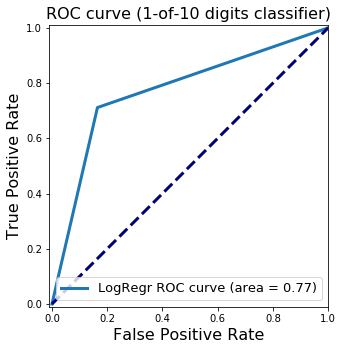

In [14]:
from sklearn.metrics import roc_curve, auc
fpr_lr, tpr_lr, _ = roc_curve(y_testGBC, y_predGBC)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(5,10))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.gca().set_aspect('equal')
plt.show()